<a href="https://colab.research.google.com/github/cjgooutside/main/blob/main/DescriptiveAnalytics_Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Day 3 CP1: Observation Unit Case Exercise: Descriptive Analytics
QTM7515 Reinforcement Learning, Dessislava A. Pachamanova

In [1]:
# Import necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Mount google drive so that your file folders are accessible to Colab
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

## Read in and preprocess data

In [ ]:
# Read in csv file and store into a dataframe called df
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/OUCase/OUDataClean.csv", sep=',')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/Colab Notebooks/OUCase/OUDataClean.csv'

In [ ]:
# Read in csv file and store into a dataframe called df
df = pd.read_csv("/content/drive/My Drive/QTM7515RL/OUDataClean.csv", sep=',')

In [ ]:
# Check that the file was read in correctly
# View the first 5 rows
print("First 5 rows:")
display(df.head())

# View the last 3 rows
print("\nLast 3 rows:")
display(df.tail(3))

# View 2 random rows
print("\n2 random rows:")
display(df.sample(2))

First 5 rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
0,905459x1,54,Male,MEDICAID STATE,OBSERVATION->INPATIENT,1,37.3,428,153,111,26,73,100,18,98.2
1,443621z2,89,Female,MEDICARE,OBSERVATION->OBSERVATION,0,89.7,599,123,64,68,86,94,18,95.9
2,131565z1,83,Female,MEDICARE,OBSERVATION->INPATIENT,1,96.3,786,105,55,29,81,94,18,97.3
3,438080x1,89,Female,MEDICARE,OBSERVATION->OBSERVATION,0,13.3,780,162,73,83,76,97,24,98.1
4,763005z1,81,Female,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,25.4,428,102,60,49,67,99,10,98.6



Last 3 rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
1096,141193z1,80,Female,MEDICARE OTHER,OBSERVATION->OBSERVATION,0,28.7,789,145,78,62,69,98,20,98.1
1097,928081x4,37,Female,MEDICAID OTHER,OBSERVATION->OBSERVATION,0,67.1,789,169,75,54,70,95,10,99.9
1098,774162z1,50,Female,MEDICAID STATE,OBSERVATION->OBSERVATION,0,20.8,789,92,51,78,55,100,13,97.7



2 random rows:


,ObservationRecordKey,Age,Gender,PrimaryInsuranceCategory,InitPatientClassAndFirstPostOUClass,Flipped,OU_LOS_hrs,DRG01,BloodPressureUpper,BloodPressureLower,BloodPressureDiff,Pulse,PulseOximetry,Respirations,Temperature
47,873663z1,46,Female,MEDICAID STATE,OBSERVATION->INPATIENT,1,66.4,789,120,66,93,79,98,16,96.6
1067,195202z1,78,Male,MEDICARE OTHER,OBSERVATION->INPATIENT,1,108.2,780,157,71,45,79,94,17,98.2


In [ ]:
# Print information about each column in the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ObservationRecordKey                 1099 non-null   object 
 1   Age                                  1099 non-null   int64  
 2   Gender                               1099 non-null   object 
 3   PrimaryInsuranceCategory             1099 non-null   object 
 4   InitPatientClassAndFirstPostOUClass  1099 non-null   object 
 5   Flipped                              1099 non-null   int64  
 6   OU_LOS_hrs                           1099 non-null   float64
 7   DRG01                                1099 non-null   int64  
 8   BloodPressureUpper                   1099 non-null   int64  
 9   BloodPressureLower                   1099 non-null   int64  
 10  BloodPressureDiff                    1099 non-null   int64  
 11  Pulse                         

In [ ]:
# Drop columns we do not need
df = df.drop(['InitPatientClassAndFirstPostOUClass'], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ObservationRecordKey      1099 non-null   object 
 1   Age                       1099 non-null   int64  
 2   Gender                    1099 non-null   object 
 3   PrimaryInsuranceCategory  1099 non-null   object 
 4   Flipped                   1099 non-null   int64  
 5   OU_LOS_hrs                1099 non-null   float64
 6   DRG01                     1099 non-null   int64  
 7   BloodPressureUpper        1099 non-null   int64  
 8   BloodPressureLower        1099 non-null   int64  
 9   BloodPressureDiff         1099 non-null   int64  
 10  Pulse                     1099 non-null   int64  
 11  PulseOximetry             1099 non-null   int64  
 12  Respirations              1099 non-null   int64  
 13  Temperature               1099 non-null   float64
dtypes: float

In [ ]:
# Change data types where necessary
# Do not change data type for Flipped, it is already 0/1

df['Gender'] = df['Gender'].astype('category')
df['PrimaryInsuranceCategory'] = df['PrimaryInsuranceCategory'].astype('category')
df['DRG01'] = df['DRG01'].astype('category')
#df['Flipped'] = df['Flipped'].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1099 entries, 0 to 1098
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ObservationRecordKey      1099 non-null   object  
 1   Age                       1099 non-null   int64   
 2   Gender                    1099 non-null   category
 3   PrimaryInsuranceCategory  1099 non-null   category
 4   Flipped                   1099 non-null   int64   
 5   OU_LOS_hrs                1099 non-null   float64 
 6   DRG01                     1099 non-null   category
 7   BloodPressureUpper        1099 non-null   int64   
 8   BloodPressureLower        1099 non-null   int64   
 9   BloodPressureDiff         1099 non-null   int64   
 10  Pulse                     1099 non-null   int64   
 11  PulseOximetry             1099 non-null   int64   
 12  Respirations              1099 non-null   int64   
 13  Temperature               1099 non-null   float6

##Visualizations

In [ ]:
#Create a categorical variable AgeCat for easier visualizations
df['AgeCat'] = pd.cut(df['Age'], list(range(19, 90, 10)), include_lowest=True, precision=0)
print(df['AgeCat'])

0       (49, 59]
1       (79, 89]
2       (79, 89]
3       (79, 89]
4       (79, 89]
          ...   
1094    (79, 89]
1095    (39, 49]
1096    (79, 89]
1097    (29, 39]
1098    (49, 59]
Name: AgeCat, Length: 1099, dtype: category
Categories (7, interval[int64, right]): [(18, 29] < (29, 39] < (39, 49] < (49, 59] < (59, 69] <
                                         (69, 79] < (79, 89]]


###Average LOS and Percentage Flipped by Age Category

In [ ]:
by_AgeCat = df.groupby("AgeCat", observed=False)

# Perform the aggregations
ave_by_AgeCat = by_AgeCat.agg(
    aveLOS_hrs=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='mean'),
    percFlipped=pd.NamedAgg(column='Flipped', aggfunc='mean'),
    n=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='count')
).reset_index()

print(ave_by_AgeCat.to_markdown())

|    | AgeCat   |   aveLOS_hrs |   percFlipped |   n |
|---:|:---------|-------------:|--------------:|----:|
|  0 | (18, 29] |      49.7872 |      0.538462 |  39 |
|  1 | (29, 39] |      55.9493 |      0.449275 |  69 |
|  2 | (39, 49] |      47.0386 |      0.39759  |  83 |
|  3 | (49, 59] |      48.9806 |      0.395161 | 124 |
|  4 | (59, 69] |      50.7019 |      0.425    | 160 |
|  5 | (69, 79] |      60.7639 |      0.463918 | 194 |
|  6 | (79, 89] |      75.8019 |      0.5      | 430 |


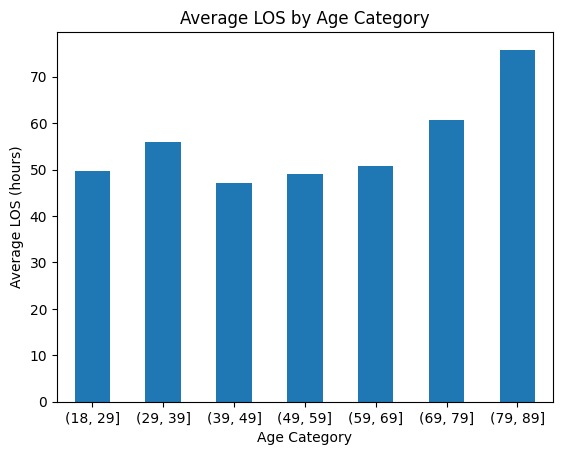

In [ ]:
#Bar chart of average LOS by age category
ave_by_AgeCat.plot(x='AgeCat', y='aveLOS_hrs', kind='bar',
                   title='Average LOS by Age Category',
                   xlabel='Age Category', ylabel='Average LOS (hours)',
                   legend=False, rot=0)
plt.show()

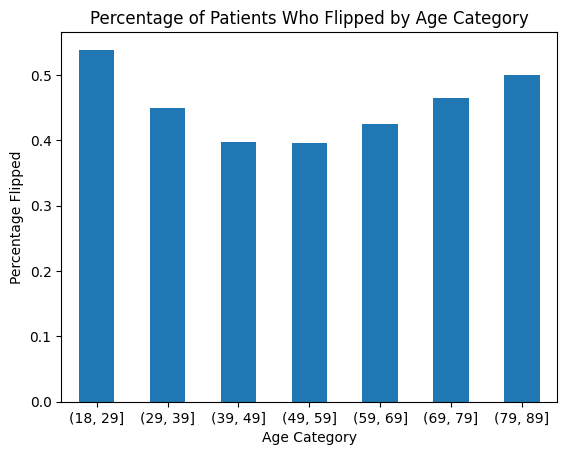

In [ ]:
#Bar chart of Percentage Flipped by age category
ave_by_AgeCat.plot(x='AgeCat', y='percFlipped', kind='bar',
                   title='Percentage of Patients Who Flipped by Age Category',
                   xlabel='Age Category', ylabel='Percentage Flipped',
                   legend=False, rot=0)
plt.show()

###Average LOS and Percentage Flipped by Gender

In [ ]:
#Tabulate Average LOS and Percentage Flipped by Gender
by_Gender = df.groupby("Gender", observed=False)
ave_by_Gender = by_Gender.agg(aveLOS_hrs=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='mean'),
                              percFlipped=pd.NamedAgg(column='Flipped', aggfunc='mean'),
                              n=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='count')).reset_index()
print(ave_by_Gender.to_markdown())

|    | Gender   |   aveLOS_hrs |   percFlipped |   n |
|---:|:---------|-------------:|--------------:|----:|
|  0 | Female   |      60.241  |      0.440184 | 652 |
|  1 | Male     |      64.8729 |      0.49217  | 447 |


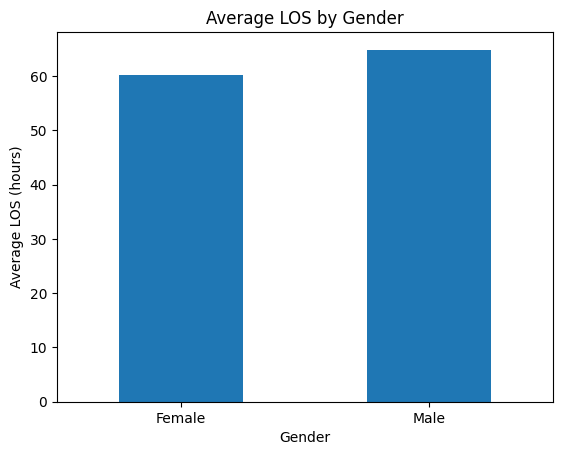

In [ ]:
#Bar chart of average LOS by Gender
ave_by_Gender.plot(x='Gender', y='aveLOS_hrs', kind='bar',
                   title='Average LOS by Gender',
                   xlabel='Gender', ylabel='Average LOS (hours)',
                   legend=False, rot=0)
plt.show()

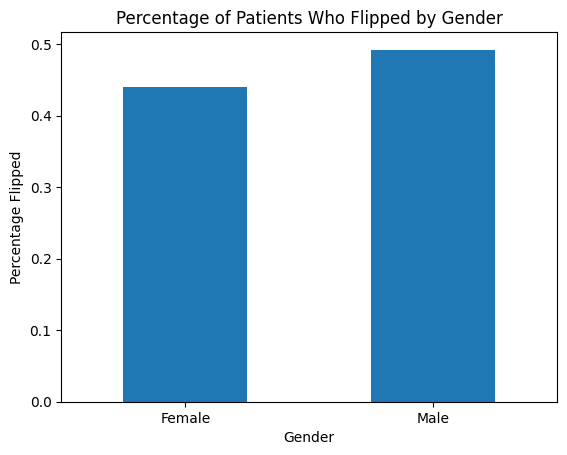

In [ ]:
#Bar chart of Percentage Flipped by Gender
ave_by_Gender.plot(x='Gender', y='percFlipped', kind='bar',
                   title='Percentage of Patients Who Flipped by Gender',
                   xlabel='Gender', ylabel='Percentage Flipped',
                   legend=False, rot=0)
plt.show()

###Average LOS and Percentage Flipped by DRG

In [ ]:
by_DRG = df.groupby("DRG01", observed=False)
ave_by_DRG = by_DRG.agg(aveLOS_hrs=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='mean'),
                        percFlipped=pd.NamedAgg(column='Flipped', aggfunc='mean'),
                        n=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='count')).reset_index()
print(ave_by_DRG.to_markdown())

|    |   DRG01 |   aveLOS_hrs |   percFlipped |   n |
|---:|--------:|-------------:|--------------:|----:|
|  0 |     276 |      66.3744 |      0.603306 | 121 |
|  1 |     428 |      58.7735 |      0.612245 |  49 |
|  2 |     486 |      56.114  |      0.578947 |  57 |
|  3 |     558 |      64.3152 |      0.727273 |  33 |
|  4 |     577 |      67.3048 |      0.761905 |  21 |
|  5 |     578 |      55.0902 |      0.536585 |  41 |
|  6 |     599 |      84.8415 |      0.658537 |  82 |
|  7 |     780 |      72.1674 |      0.372483 | 298 |
|  8 |     782 |      52.9652 |      0.391304 |  23 |
|  9 |     786 |      50.7243 |      0.337838 | 148 |
| 10 |     787 |      62.8723 |      0.457831 |  83 |
| 11 |     789 |      41.7091 |      0.328671 | 143 |


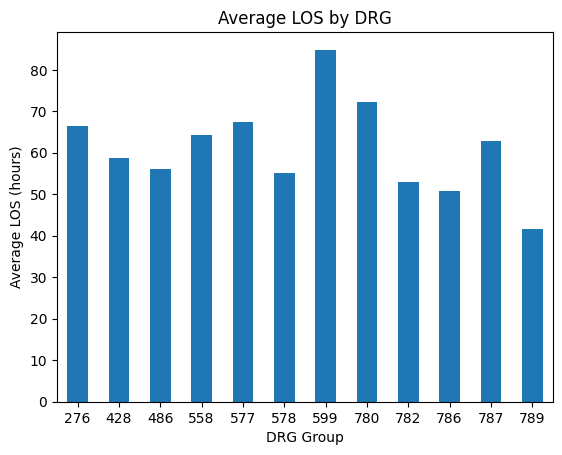

In [ ]:
#Bar chart of Average LOS by DRG
ave_by_DRG.plot(x='DRG01', y='aveLOS_hrs', kind='bar',
                title='Average LOS by DRG',
                xlabel='DRG Group', ylabel='Average LOS (hours)',
                legend=False, rot=0)
plt.show()

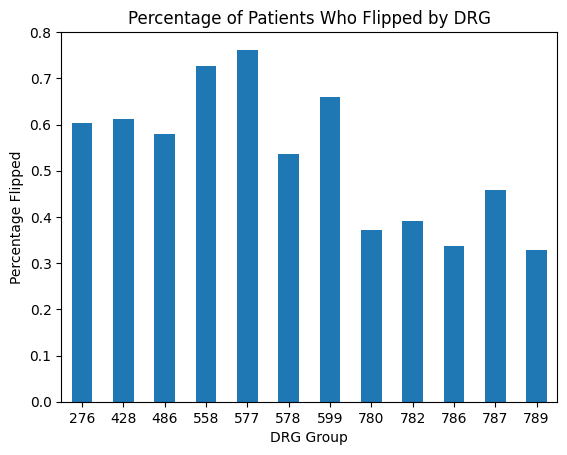

In [ ]:
#Bar chart of percentage flipped by DRG
ave_by_DRG.plot(x='DRG01', y='percFlipped', kind='bar',
                title='Percentage of Patients Who Flipped by DRG',
                xlabel='DRG Group', ylabel='Percentage Flipped',
                legend=False, rot=0)
plt.show()

###Average LOS, Percentage Flipped, and number of obs by Age Category, Gender and DRG

In [ ]:
by_AgeCat_Gender = df.groupby(["AgeCat", "Gender"], observed=False)
ave_by_AgeCat_Gender = by_AgeCat_Gender.agg(aveLOS_hrs=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='mean'),
                                            percFlipped=pd.NamedAgg(column='Flipped', aggfunc='mean'),
                                            n=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='count')).reset_index()
print(ave_by_AgeCat_Gender.to_markdown())

|    | AgeCat   | Gender   |   aveLOS_hrs |   percFlipped |   n |
|---:|:---------|:---------|-------------:|--------------:|----:|
|  0 | (18, 29] | Female   |      52.3304 |      0.521739 |  23 |
|  1 | (18, 29] | Male     |      46.1313 |      0.5625   |  16 |
|  2 | (29, 39] | Female   |      46.5533 |      0.4      |  45 |
|  3 | (29, 39] | Male     |      73.5667 |      0.541667 |  24 |
|  4 | (39, 49] | Female   |      49.8776 |      0.44898  |  49 |
|  5 | (39, 49] | Male     |      42.9471 |      0.323529 |  34 |
|  6 | (49, 59] | Female   |      42.2515 |      0.367647 |  68 |
|  7 | (49, 59] | Male     |      57.1518 |      0.428571 |  56 |
|  8 | (59, 69] | Female   |      51.1367 |      0.387755 |  98 |
|  9 | (59, 69] | Male     |      50.0145 |      0.483871 |  62 |
| 10 | (69, 79] | Female   |      54.5467 |      0.411215 | 107 |
| 11 | (69, 79] | Male     |      68.4103 |      0.528736 |  87 |
| 12 | (79, 89] | Female   |      75.6244 |      0.48855  | 262 |
| 13 | (79

In [ ]:
by_AgeCat_Gender = df.groupby(["AgeCat", "Gender"], observed=False)
ave_by_AgeCat_Gender = by_AgeCat_Gender['Flipped'].mean().reset_index()
ave_by_AgeCat_Gender = ave_by_AgeCat_Gender.pivot_table(values='Flipped',
                                                        columns='Gender',
                                                        index=ave_by_AgeCat_Gender['AgeCat'],
                                                        aggfunc='mean',observed=False).reset_index()
print(ave_by_AgeCat_Gender.to_markdown())

|    | AgeCat   |   Female |     Male |
|---:|:---------|---------:|---------:|
|  0 | (18, 29] | 0.521739 | 0.5625   |
|  1 | (29, 39] | 0.4      | 0.541667 |
|  2 | (39, 49] | 0.44898  | 0.323529 |
|  3 | (49, 59] | 0.367647 | 0.428571 |
|  4 | (59, 69] | 0.387755 | 0.483871 |
|  5 | (69, 79] | 0.411215 | 0.528736 |
|  6 | (79, 89] | 0.48855  | 0.517857 |


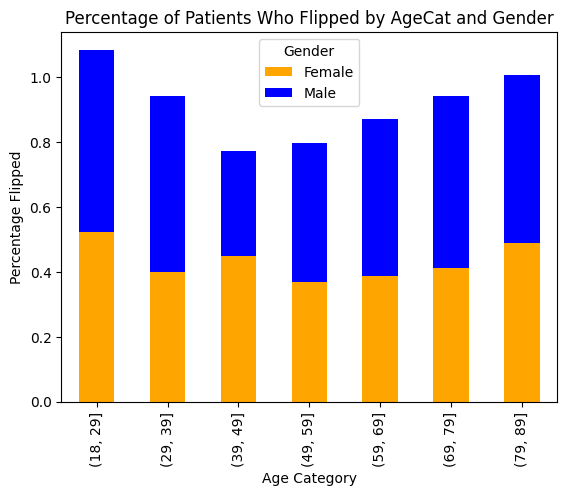

In [ ]:
#Bar chart of Percentage Flipped by Gender
ave_by_AgeCat_Gender.plot(x='AgeCat', kind='bar', stacked=True,
                          title='Percentage of Patients Who Flipped by AgeCat and Gender',
                          xlabel='Age Category', ylabel='Percentage Flipped',
                          color=['orange', 'b'])
plt.show()

In [ ]:
#Percentage Flipped by DRG and Gender
by_DRG_Gender = df.groupby(["DRG01", "Gender"], observed=False)
ave_by_DRG_Gender = by_DRG_Gender['Flipped'].mean().reset_index()
ave_by_DRG_Gender = ave_by_DRG_Gender.pivot_table(values='Flipped', columns='Gender',
                                                  index=ave_by_DRG_Gender['DRG01'],
                                                  aggfunc='mean', observed=False).reset_index()
print(ave_by_DRG_Gender.to_markdown())

|    |   DRG01 |   Female |     Male |
|---:|--------:|---------:|---------:|
|  0 |     276 | 0.626506 | 0.552632 |
|  1 |     428 | 0.6      | 0.62069  |
|  2 |     486 | 0.62069  | 0.535714 |
|  3 |     558 | 0.75     | 0.6      |
|  4 |     577 | 0.818182 | 0.7      |
|  5 |     578 | 0.65     | 0.428571 |
|  6 |     599 | 0.560976 | 0.756098 |
|  7 |     780 | 0.382353 | 0.359375 |
|  8 |     782 | 0.266667 | 0.625    |
|  9 |     786 | 0.285714 | 0.40625  |
| 10 |     787 | 0.408163 | 0.529412 |
| 11 |     789 | 0.254902 | 0.512195 |


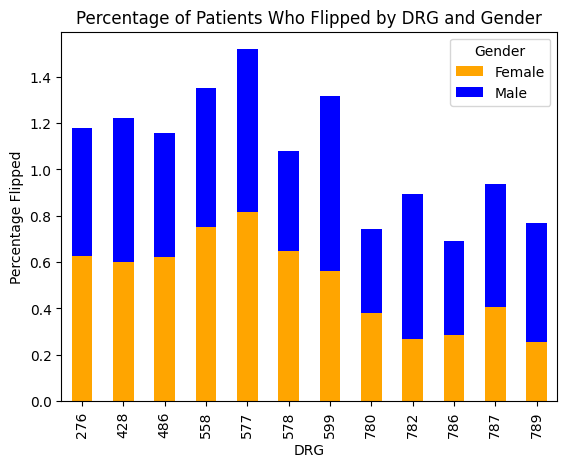

In [ ]:
#Bar chart of Percentage Flipped by DRG and Gender
ave_by_DRG_Gender.plot(x='DRG01', kind='bar', stacked=True,
                       title='Percentage of Patients Who Flipped by DRG and Gender',
                       xlabel='DRG',  # This was previously mislabeled as 'Age Category'
                       ylabel='Percentage Flipped',
                       color=['orange', 'b'])  # Specify colors: blue for Male, orange for Female
plt.show()

###Percentage Flipped by Primary Insurance Category

In [ ]:
by_Insur = df.groupby("PrimaryInsuranceCategory", observed=False)
ave_by_Insur = by_Insur['Flipped'].mean().reset_index()
print(ave_by_Insur.to_markdown())

|    | PrimaryInsuranceCategory   |   Flipped |
|---:|:---------------------------|----------:|
|  0 | MEDICAID OTHER             |  0.427184 |
|  1 | MEDICAID STATE             |  0.421053 |
|  2 | MEDICARE                   |  0.60625  |
|  3 | MEDICARE OTHER             |  0.406619 |
|  4 | Private                    |  0.360759 |


In [ ]:
by_Insur = df.groupby("PrimaryInsuranceCategory", observed=False)

# Perform the aggregations
ave_by_Insur = by_Insur.agg(
    aveLOS_hrs=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='mean'),
    percFlipped=pd.NamedAgg(column='Flipped', aggfunc='mean'),
    n=pd.NamedAgg(column='OU_LOS_hrs', aggfunc='count')
).reset_index()

print(ave_by_Insur.to_markdown())

|    | PrimaryInsuranceCategory   |   aveLOS_hrs |   percFlipped |   n |
|---:|:---------------------------|-------------:|--------------:|----:|
|  0 | MEDICAID OTHER             |      52.133  |      0.427184 | 103 |
|  1 | MEDICAID STATE             |      54.5537 |      0.421053 |  95 |
|  2 | MEDICARE                   |      69.5797 |      0.60625  | 320 |
|  3 | MEDICARE OTHER             |      67.7839 |      0.406619 | 423 |
|  4 | Private                    |      42.9424 |      0.360759 | 158 |


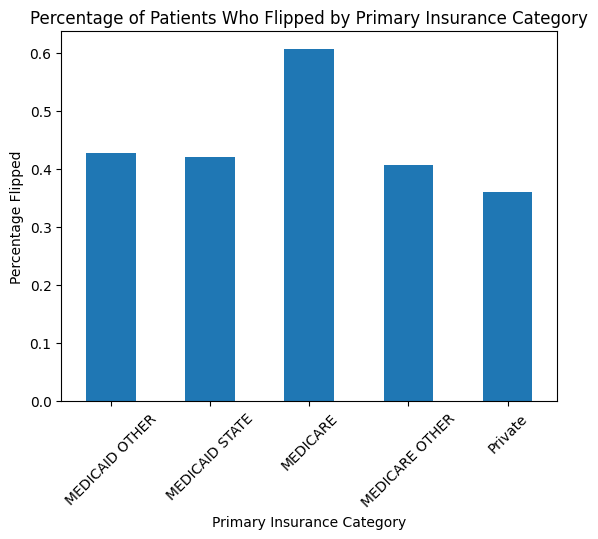

In [ ]:
#Bar chart of Percentage Flipped by PrimaryInsuranceCategory
ave_by_Insur.plot(x='PrimaryInsuranceCategory', y='percFlipped', kind='bar',
                  title='Percentage of Patients Who Flipped by Primary Insurance Category',
                  xlabel='Primary Insurance Category', ylabel='Percentage Flipped',
                  legend=False, rot=45)
plt.show()

In [ ]:
by_DRG_Insur = df.groupby(["DRG01", "PrimaryInsuranceCategory"], observed=False)
ave_by_DRG_Insur = by_DRG_Insur['Flipped'].mean().reset_index()
ave_by_DRG_Insur = ave_by_DRG_Insur.pivot_table(values='Flipped',
                                                columns='PrimaryInsuranceCategory',
                                                index=ave_by_DRG_Insur['DRG01'],
                                                aggfunc='mean',
                                                observed=False).reset_index()
print(ave_by_DRG_Insur.to_markdown())

|    |   DRG01 |   MEDICAID OTHER |   MEDICAID STATE |   MEDICARE |   MEDICARE OTHER |    Private |
|---:|--------:|-----------------:|-----------------:|-----------:|-----------------:|-----------:|
|  0 |     276 |         0.615385 |         0.666667 |   0.65     |         0.5625   |   0.545455 |
|  1 |     428 |         1        |         0.75     |   0.789474 |         0.44     | nan        |
|  2 |     486 |         0.333333 |         0.8      |   0.764706 |         0.5      |   0.4      |
|  3 |     558 |         0.7      |         1        |   0.75     |         0.6      |   0.833333 |
|  4 |     577 |         0.75     |         0        |   0.666667 |         0.75     |   0.888889 |
|  5 |     578 |         0.666667 |         0.6      |   0.727273 |         0.470588 |   0.2      |
|  6 |     599 |         0.5      |         0.857143 |   0.710526 |         0.6      |   0.4      |
|  7 |     780 |         0.333333 |         0.15     |   0.535354 |         0.297297 |   0.36     |


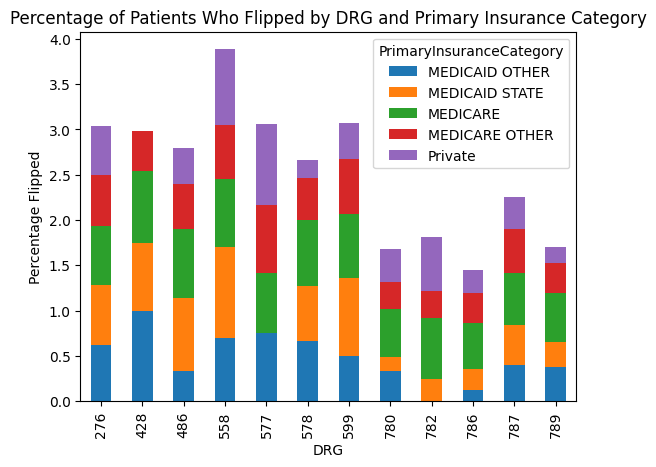

In [ ]:
#Bar chart of Percentage Flipped by DRG and Insurance Type
ave_by_DRG_Insur.plot(x='DRG01', kind='bar', stacked=True,
                      title='Percentage of Patients Who Flipped by DRG and Primary Insurance Category',
                      xlabel='DRG', ylabel='Percentage Flipped')
plt.show()

Great job! Now you have looked at various data summaries and visualizations to understand whether or not an observation status patient will flip.

Additional tests conducted

In [ ]:
from scipy import stats

# Perform a t-test to compare the average LOS between males and females
male_los = df[df['Gender'] == 'Male']['OU_LOS_hrs']
female_los = df[df['Gender'] == 'Female']['OU_LOS_hrs']
t_statistic, p_value = stats.ttest_ind(male_los, female_los)

print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 1.485818520285824
P-value: 0.13761444538636763


In [ ]:
from scipy import stats

# Perform ANOVA to compare the average LOS between different DRG groups
drg_groups = df['DRG01'].unique()
los_by_drg = [df[df['DRG01'] == drg]['OU_LOS_hrs'] for drg in drg_groups]
f_statistic, p_value = stats.f_oneway(*los_by_drg)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

F-statistic: 5.943778672582098
P-value: 1.8486109178647588e-09


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_result = pairwise_tukeyhsd(df['OU_LOS_hrs'], df['DRG01'], alpha=0.05)

# Print the results
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
   276    428  -7.6009 0.9991 -35.0984  19.8965  False
   276    486 -10.2603 0.9806 -36.3482  15.8275  False
   276    558  -2.0592    1.0 -33.9503  29.8319  False
   276    577   0.9304    1.0 -37.4581  39.3188  False
   276    578 -11.2841 0.9837  -40.629  18.0607  False
   276    599  18.4671 0.2786  -4.7607  41.6948  False
   276    780   5.7931 0.9953  -11.712  23.2982  False
   276    782 -13.4092 0.9898  -50.348  23.5297  False
   276    786 -15.6501  0.295 -35.5527   4.2526  False
   276    787  -3.5021    1.0 -26.6463  19.6421  False
   276    789 -24.6653 0.0035 -44.7239  -4.6067   True
   428    486  -2.6594    1.0  -34.295  28.9762  False
   428    558   5.5417    1.0 -31.0271  42.1105  False
   428    577   8.5313    1.0 -33.8233  50.8858  False
   428    578  -3.6832    1.0 -38.0541  30.6876  False
   428    

In [ ]:
from scipy import stats

# Create a contingency table of gender and flipped status
contingency_table = pd.crosstab(df['Gender'], df['Flipped'])

# Perform a chi-squared test
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-squared statistic:", chi2_statistic)
print("P-value:", p_value)

Chi-squared statistic: 2.678599929572928
P-value: 0.10170510961810485


In [ ]:
# Calculate the correlation between age and LOS
correlation = df['Age'].corr(df['OU_LOS_hrs'])

print("Correlation:", correlation)

Correlation: 0.19605401940205117


In [ ]:
import statsmodels.formula.api as sm

# Create a linear regression model to predict LOS based on age and gender
model = sm.ols('OU_LOS_hrs ~ Age + Gender', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             OU_LOS_hrs   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     23.21
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.34e-10
Time:                        14:55:55   Log-Likelihood:                -5852.8
No. Observations:                1099   AIC:                         1.171e+04
Df Residuals:                    1096   BIC:                         1.173e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         22.8099      5.962      3.

In [ ]:
import statsmodels.formula.api as sm

# Create the linear regression model
model = sm.ols('OU_LOS_hrs ~ Age + Gender + DRG01', data=df).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             OU_LOS_hrs   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     6.770
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           1.23e-12
Time:                        14:58:07   Log-Likelihood:                -5832.7
No. Observations:                1099   AIC:                         1.169e+04
Df Residuals:                    1085   BIC:                         1.176e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.2376      7.909      4.

In [ ]:
import statsmodels.formula.api as sm

# Create the linear regression model
model1 = sm.ols('Flipped ~ Age + Gender + DRG01', data=df).fit()

# Print the model summary
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                Flipped   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     6.604
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           2.95e-12
Time:                        15:16:37   Log-Likelihood:                -752.50
No. Observations:                1099   AIC:                             1533.
Df Residuals:                    1085   BIC:                             1603.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5273      0.078      6.

In [ ]:
import statsmodels.formula.api as sm

# Create the linear regression model
model3 = sm.ols('Flipped ~ Age + Gender + PrimaryInsuranceCategory + DRG01 + BloodPressureDiff + Pulse + PulseOximetry + Respirations + Temperature', data=df).fit()

# Print the model summary
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                Flipped   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     5.848
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           5.74e-16
Time:                        15:23:41   Log-Likelihood:                -732.28
No. Observations:                1099   AIC:                             1511.
Df Residuals:                    1076   BIC:                             1626.
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
import statsmodels.formula.api as sm

# Model 1: Only intercept
model1 = sm.logit('Flipped ~ 1', data=df).fit()

# Model 2: With all predictors
model2 = sm.logit('Flipped ~ Age + Gender + PrimaryInsuranceCategory + DRG01 + BloodPressureDiff + Pulse + PulseOximetry + Respirations + Temperature', data=df).fit()

# Compare deviances
print(model1.summary())
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.690153
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.634830
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                Flipped   No. Observations:                 1099
Model:                          Logit   Df Residuals:                     1098
Method:                           MLE   Df Model:                            0
Date:                Sat, 01 Feb 2025   Pseudo R-squ.:               3.436e-12
Time:                        15:26:11   Log-Likelihood:                -758.48
converged:                       True   LL-Null:                       -758.48
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Interc